<h4>Importing Important Libraries</h4>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import cv2

<h4>Loading Dataset</h4>

In [2]:
def load_dataset(path):
    data=loadmat(path)
    return data['images'],data['label']

<h4>Preprocessing Training Data</h4>

In [3]:
def data_augmentation(data):
    datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(data)
    return datagen

<h4>Defining CNN Model & Compiling The Model</h4>

In [5]:
def build_model(input_shape):
    model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.2),
    Dense(units=7, activation='softmax')
])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

<h4>Defining Training Function</h4>

In [6]:
def train_model(model, augment, X_train, label, X_val, label_val, batch_size, epochs):

    history = model.fit(augment.flow(X_train, label, batch_size=batch_size),
                            validation_data=(X_val, label_val),
                            epochs=epochs)
    return history

<h4> Visualizing Function</h4>

In [7]:
def visualize_dataset(dataset,label):
    plt.figure(figsize=(15, 15))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(dataset[i])
        plt.title(f"Labeled: {label[i]}")
        plt.axis('off')
    plt.show()

<h4>Splitting Data Into Training And Testing</h4>

In [8]:
x_train,y_train=load_dataset("training.mat")
y_train=np.moveaxis(y_train, -1, 0)
x_test,y_test=load_dataset("testing.mat")
y_test=np.moveaxis(y_test, -1, 0)

<h4>Calling The Above Define Functions</h4>

In [9]:
train_augment=data_augmentation(x_train)

In [10]:
x_train.shape[1:]

(48, 48, 3)

In [15]:
cnn_model=build_model(input_shape=(48, 48,1))

c:\Users\zanam\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h4>Model Summary</h4>

In [16]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,819,911 (6.94 MB)

 Trainable params: 1,817,991 (6.94 MB)

 Non-trainable params: 1,920 (7.50 KB)

<h4>Training The Defined Model</h4>

In [17]:
def edges_detection(data):
    edges_list = []
    for i in range(len(data)):
        gray=cv2.cvtColor(data[i],cv2.COLOR_RGB2GRAY)
        #img_blur = cv2.GaussianBlur(data[i], (5, 5), 0)
        #edge=cv2.Canny(img_blur, threshold1=canny_threshold1, threshold2=canny_threshold2)
        edges_list.append(gray)
    return edges_list

In [18]:
x_train=edges_detection(x_train)

In [19]:
x_test=edges_detection(x_test)

In [20]:
x_test=np.array(x_test)

In [21]:
x_train=np.array(x_train)

In [22]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [25]:
x_test=x_test/255
x_train=x_train/255

In [27]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [28]:
per_history=train_model(cnn_model,train_augment,x_train,y_train,x_test,y_test,64,10)

Epoch 1/10


c:\Users\zanam\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 710s 2s/step - accuracy: 0.2941 - loss: 1.9374 - val_accuracy: 0.2240 - val_loss: 2.0721
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.4732 - loss: 1.3855 - val_accuracy: 0.4638 - val_loss: 1.3714
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 660s 1s/step - accuracy: 0.5109 - loss: 1.2785 - val_accuracy: 0.4889 - val_loss: 1.4412
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.5470 - loss: 1.2104 - val_accuracy: 0.5553 - val_loss: 1.1686
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.5525 - loss: 1.1828 - val_accuracy: 0.4745 - val_loss: 1.3597
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.5640 - loss: 1.1481 - val_accuracy: 0.5336 - val_loss: 1.2481
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.5781 - loss: 1.1130 - val_accuracy: 0.5362 - val_loss: 1.2306
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 659s 1s/step - accuracy: 0.5928 - loss: 1.0788 - val_accuracy: 0.554

<h4>Evaluating The Model</h4>

In [29]:
y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

225/225 ━━━━━━━━━━━━━━━━━━━━ 55s 243ms/step
              precision    recall  f1-score   support

           0       0.43      0.60      0.50       958
           1       0.45      0.23      0.30       111
           2       0.47      0.28      0.35      1024
           3       0.82      0.79      0.81      1774
           4       0.47      0.71      0.57      1233
           5       0.55      0.33      0.41      1247
           6       0.71      0.75      0.73       831

    accuracy                           0.59      7178
   macro avg       0.56      0.53      0.52      7178
weighted avg       0.59      0.59      0.57      7178



<h4>Ploting The Training And Validation Accuracy</h4>

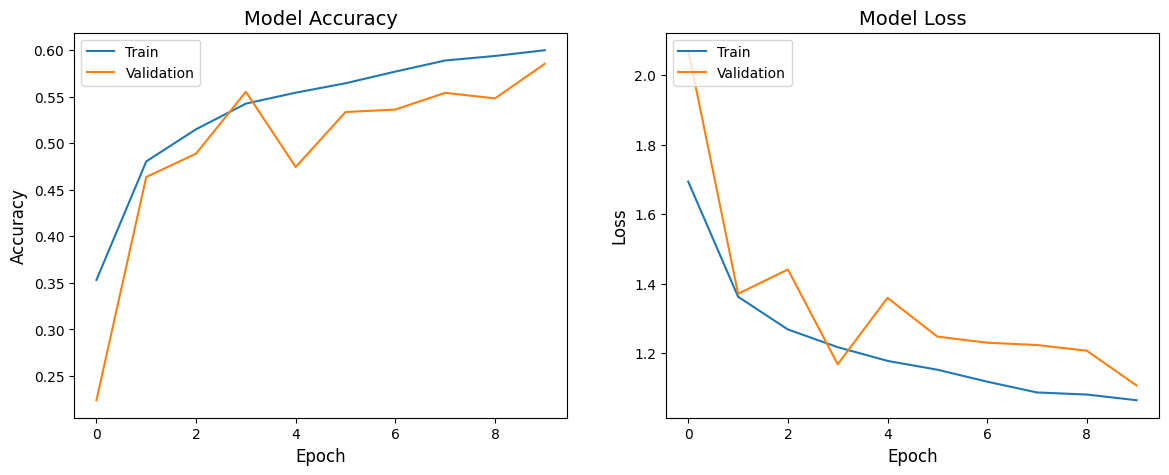

In [30]:
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(per_history.history['accuracy'])
plt.plot(per_history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(per_history.history['loss'])
plt.plot(per_history.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

<h4>Accuracy, Precision, Recall, F1-Score Of The Model</h4>

In [31]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.5854
Precision: 0.5946
Recall: 0.5854
F1-Score: 0.5748


<h4>Confusion Matrix</h4>

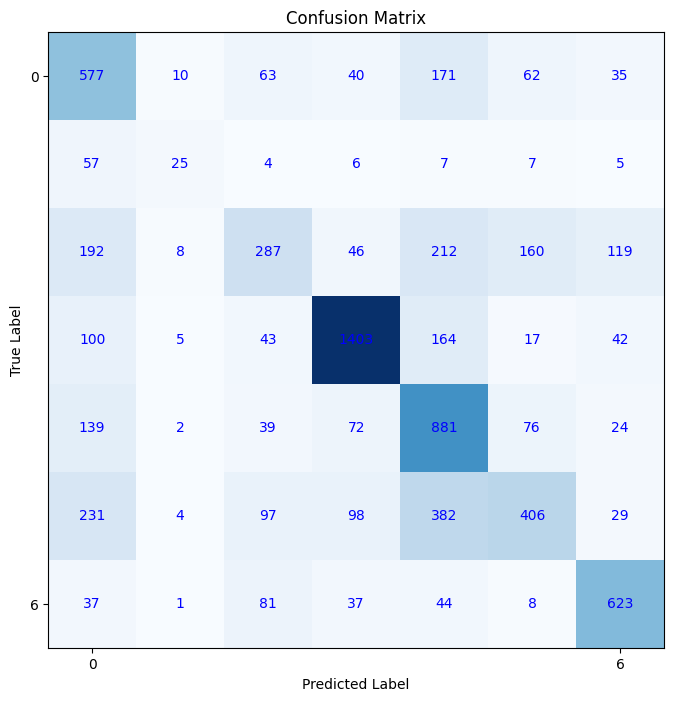

In [34]:
conf_matrix=confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix,cmap='Blues',interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0,6],['0','6'])
plt.yticks([0,6],['0','6'])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j,i,conf_matrix[i,j],ha='center',va="center",color="b")
plt.show()

<h4>Some Predicted Classes By Model And Their Actual Class</h4>

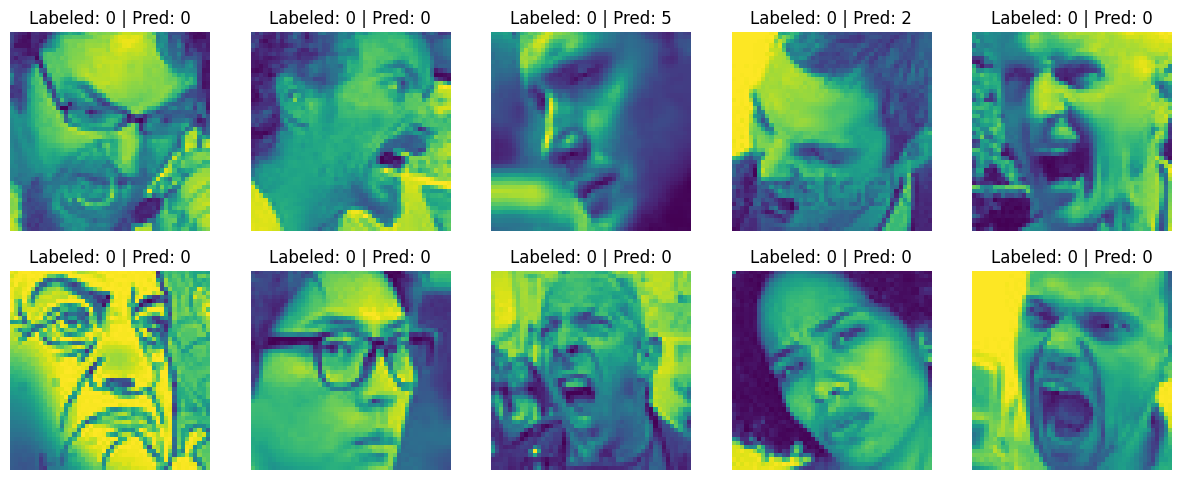

In [35]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Labeled: {true_classes[i]} | Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()

<h4>Saving The Model</h4>

In [37]:
cnn_model.save("cv_cnn_model.h5")